### Keertana V. Chidambaram <br/> PS 3

In [406]:
import numpy as np
import time
from scipy.optimize import fsolve, root
import matplotlib.pyplot as plt

In [407]:
beta = 0.442
delta = 0.6415
sigma = 3
A = 1
alpha = 0.35
nvec = [1, 1, 0.2]

In [408]:
# Solution 2.1
def feasible(f_params, bvec_guess):
        nvec, A, alpha, delta = f_params
        b2, b3 = bvec_guess
        K = sum(bvec_guess)
        K_cnstr = (K <= 0)
        
        L = sum(nvec)
        w = (1 - alpha) * A * (K / L) ** alpha
        r = alpha * A * (L / K) ** (1 - alpha) - delta
        c1 = nvec[0] * w - b2
        c2 = nvec[1] * w + (1 + r) * b2 - b3
        c3 = nvec[2] * w + (1 + r) * b3
        c_cnstr = [(c1 <= 0), (c2 <= 0), (c3 <= 0)]
        b_cnstr = [c_cnstr[0] or c_cnstr[1], c_cnstr[1] or c_cnstr[2]]
        
        return b_cnstr, c_cnstr, K_cnstr

In [409]:
f_params = nvec, A, alpha, delta
bvec_guess = np.array([1.0, 1.2])
feasible(f_params, bvec_guess)

([True, False], [True, False, False], False)

c1 violates the non-negativity constraint. b2 is responsible for the violation.

In [410]:
bvec_guess = np.array([0.06, -0.001])
feasible(f_params, bvec_guess)

([False, False], [False, False, False], False)

No constraints are violated for this guess.

In [411]:
bvec_guess = np.array([0.1, 0.1])
feasible(f_params, bvec_guess)

([False, False], [False, False, False], False)

No constraints are violated for this guess also.

In [412]:
# Solution 2.2
def get_SS(params, bvec_guess, SS_graphs):
    start_time = time.clock()
    beta, sigma, nvec, L, A, alpha, delta, SS_tol = params
    
    b_ss = np.array(root(solver, bvec_guess, args=params).x)
    K_ss = sum(b_ss)
    w_ss = (1 -alpha) * A * (K_ss / L) ** alpha
    r_ss = alpha * A * (L / K_ss) ** (1 - alpha) - delta
    Y_ss=A * (K_ss ** alpha) * (L ** (1 - alpha))

    c1 = w_ss - b_ss[0]
    c2 = w_ss + (1 + r_ss) * b_ss[0] - b_ss[1]
    c3 = 0.2 * w_ss + (1 + r_ss) * b_ss[1]
    c_ss = np.array([c1, c2, c3])
    C_ss = c1 + c2 + c3
    
    EE1 = (c_ss[0] ** -sigma) - beta * (1 + r_ss) * (c_ss[1] ** -sigma)
    EE2 = (c_ss[1] ** -sigma) - beta * (1 + r_ss) * (c_ss[2] ** -sigma)
    EulErr_ss = np.array([EE1, EE2])
    
    
    RCerr_ss = Y_ss - C_ss - delta * K_ss
    ss_time = time.clock() - start_time
    
    if SS_graphs:
        %matplotlib notebook
        t1 = np.array([1,2,3])
        t2 = np.array([2,3])
        plt.plot(t1, c_ss, marker='o',label='consumption')
        plt.plot(t2, b_ss, marker='o',label='savings')
        plt.xlabel('Agent\'s age')
        plt.ylabel('Agent\'s comsumption, savings')
        plt.title('Steady-state equillibrium')
        plt.legend()
    
    ss_output = {'b_ss': b_ss, 
                 'c_ss': c_ss, 
                 'w_ss': w_ss, 
                 'r_ss': r_ss,
                 'K_ss': K_ss,
                 'Y_ss': Y_ss,
                 'C_ss': C_ss,
                 'EulErr_ss': EulErr_ss,
                 'RCerr_ss': RCerr_ss,
                 'ss_time': ss_time}
    return ss_output

In [413]:
def solver(bvec_guess, *args):
    b2, b3 = bvec_guess
    beta, sigma, nvec, L, A, alpha, delta, SS_tol = args

    K_ss = b2 + b3
    w_ss = (1 - alpha) * A * (K_ss / L) ** alpha
    r_ss = alpha * A * (L / K_ss) ** (1 - alpha) - delta
    C_ss = [w_ss-b2, w_ss + (1 + r_ss) * b2 - b3, 0.2 * w_ss + (1 + r_ss) * b3]
    
    EE1 = (C_ss[0] ** -sigma) - beta * (1 + r_ss) * (C_ss[1] ** -sigma) 
    EE2 = (C_ss[1] ** -sigma) - beta * (1 + r_ss) * (C_ss[2] ** -sigma) 
    EulErr_ss = np.array([EE1, EE2])
    
    return EulErr_ss

In [414]:
L = 2.2
SS_tol = 1e-9
params = (beta, sigma, nvec, L, A, alpha, delta, SS_tol)
res = get_SS(params, bvec_guess, False)
print("Equillibrium values for the parameters:")
res

Equillibrium values for the parameters:


C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


{'b_ss': array([0.01931253, 0.0584111 ]),
 'c_ss': array([0.18241213, 0.20961468, 0.24087387]),
 'w_ss': 0.20172465739052575,
 'r_ss': 2.433062339127069,
 'K_ss': 0.07772362575316386,
 'Y_ss': 0.6827603788602411,
 'C_ss': 0.6329006729395864,
 'EulErr_ss': array([-1.39266376e-12,  2.62900812e-12]),
 'RCerr_ss': 8.326672684688674e-17,
 'ss_time': 0.0003575689988792874}

Graph for the steady state distribution:


C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


<IPython.core.display.Javascript object>


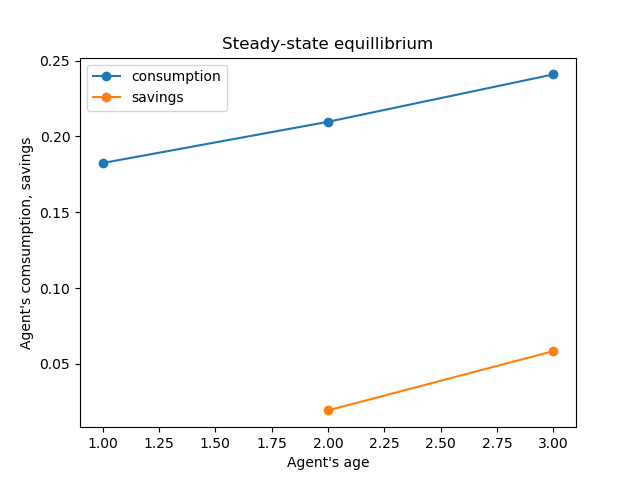

{'b_ss': array([0.01931253, 0.0584111 ]),
 'c_ss': array([0.18241213, 0.20961468, 0.24087387]),
 'w_ss': 0.20172465739052575,
 'r_ss': 2.433062339127069,
 'K_ss': 0.07772362575316386,
 'Y_ss': 0.6827603788602411,
 'C_ss': 0.6329006729395864,
 'EulErr_ss': array([-1.39266376e-12,  2.62900812e-12]),
 'RCerr_ss': 8.326672684688674e-17,
 'ss_time': 0.0008491779990436044}

In [416]:
print("Graph for the steady state distribution:")
get_SS(params, bvec_guess, True)

In [417]:
beta = 0.55
params2 = (beta, sigma, nvec, L, A, alpha, delta, SS_tol)
res2 = get_SS(params2, bvec_guess, False)
print("Equillibrium values for the new parameters:")
res2

Equillibrium values for the new parameters:


C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


{'b_ss': array([0.02817692, 0.07686545]),
 'c_ss': array([0.19597528, 0.22861594, 0.26669307]),
 'w_ss': 0.22415219593446706,
 'r_ss': 1.8863765057189819,
 'K_ss': 0.1050423702259807,
 'Y_ss': 0.7586689708551193,
 'C_ss': 0.6912842903551526,
 'EulErr_ss': array([6.87805368e-12, 2.52953214e-12]),
 'RCerr_ss': 9.71445146547012e-17,
 'ss_time': 0.00044516799971461296}

Consumption, savings and wage increases (in every period) but interest rates decrease. This is because as beta increases, the value of future consuption decreases so agents would increase their savings. This increased savings leads to higher wages and lower interest rates from the firms because of increased firm capital. This leads to increased consumption.

In [426]:
# Solution 2.3
eps, T = 1e-9, 50
b_ss = res['b_ss']
bvec_init = res['b_ss'] * [0.8 * 1.1]
K_ss = sum(b_ss)
K_init = sum(bvec_init)

K_path = np.linspace(K_init, K_ss, T)
#K_path = np.concatenate((K_path, np.array([K_ss] * 5)))
w_path = (1 - alpha) * A * (K_path / 2.2) ** alpha
r_path = alpha * A * (2.2 / K_path) ** (1 - alpha) - delta

def update_paths(K_old_path, K_new_path, zeta=0.05):
    K_path = K_old_path * (1 - zeta) + K_new_path * zeta
    w_path = (1 - alpha) * A * (K_path / 2.2) ** alpha
    r_path = alpha * A * (2.2 / K_path) ** (1 - alpha) - delta
    return K_path, w_path, r_path

In [427]:
# New error function defined because w, r not stationery
def EulErr(bvec, *args):
    w1, w2, w3, r2, r3, beta, alpha, delta, sigma, A, nvec = args
    b2, b3 = bvec
    L = sum(nvec)
    K = b2 + b3
    C = [nvec[0] * w1 - b2, 
        nvec[1] * w2 + (1 + r2) * b2 - b3, 
        nvec[2] * 0.2 * w3 + (1 + r3) * b3]

    EE1 = (C[0] ** -sigma) - beta * (1 + r2) * (C[1] ** -sigma) 
    EE2 = (C[1] ** -sigma) - beta * (1 + r3) * (C[2] ** -sigma) 
    EulErr = np.array([EE1, EE2])
    return EulErr
def partial_EUErr(b, *args):
    w1, w2, r1, r2, b2, b3, sigma, beta, nvec = args
    C = [nvec[0] * w1 - b2, nvec[1] * w2 + (1 + r2) * b2 - b3] 
    EE1 = (C[0] ** -sigma) - beta * (1 + r2) * (C[1] ** -sigma)
    return EE1

In [428]:
dist_vec = []
iteration = 1
K_path_new = K_path.copy()
b2_vec = [0.1] * (T)
b3_vec = [0.1] * (T)

In [429]:
while 1:        
    for i in range(T):
        if i == 0:
            b2_vec[i], b3_vec[i] = bvec_init
        elif i == 49:
            b2_vec[i], b3_vec[i] = res['b_ss']
        else:
            r2, r3 = r_path[i], r_path[i+1]
            w1, w2, w3 = w_path[i-1], w_path[i], w_path[i+1]            
            if i == 1:
                params = w1, w2, r1, r2, b2, b3, sigma, beta, nvec
                b3_vec[i] = root(partial_EUErr, 0.1, args=params).x
            params = w1, w2, w3, r2, r3, beta, alpha, delta, sigma, A, nvec
            bvec_guess = [0.1, 0.1]
            b2_vec[i], b3_vec[i + 1] = np.array(root(EulErr, bvec_guess, args=params).x)
            
    K_path_new[i] = b2_vec[i] + b3_vec[i]
    dist = sum((K_path_new - K_path) ** 2)
    dist_vec.append(dist)

    print(iteration, dist)
    iteration = iteration + 1
    K_path, w_path, r_path = update_paths(K_path.copy(), K_path_new.copy())
    if dist < eps:
        break

1 0.0


In [430]:
print('maximum euler distance:', max(dist_vec))

maximum euler distance: 0.0


<IPython.core.display.Javascript object>


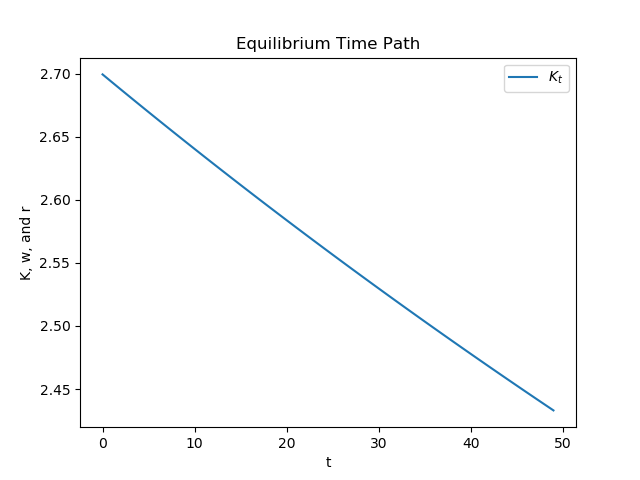

In [431]:
%matplotlib notebook
plt.plot(np.arange(0,T), r_path, label='$K_{t}$')
plt.xlabel('t')
plt.ylabel('K, w, and r')
plt.title('Equilibrium Time Path')
plt.legend()

<IPython.core.display.Javascript object>


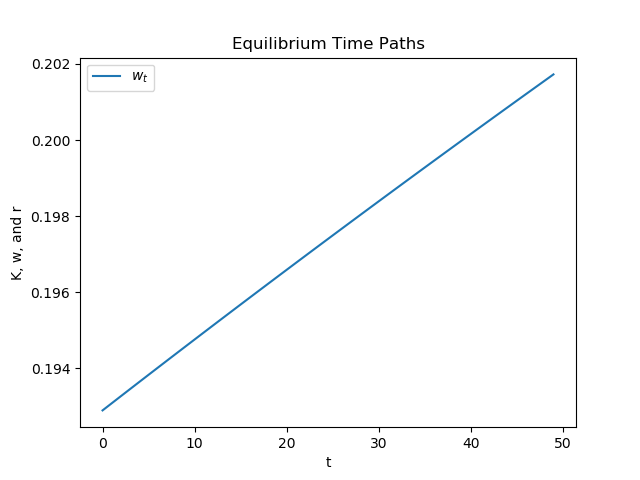

In [432]:
plt.plot(np.arange(0,T), w_path ,label='$w_{t}$')
plt.xlabel('t')
plt.ylabel('K, w, and r')
plt.title('Equilibrium Time Paths')
plt.legend()

<IPython.core.display.Javascript object>


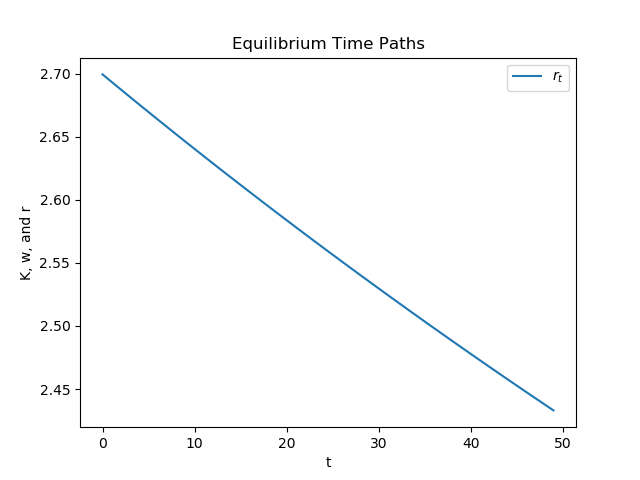

In [433]:
%matplotlib notebook
plt.plot(np.arange(0,T), r_path, label='$r_{t}$')
plt.xlabel('t')
plt.ylabel('K, w, and r')
plt.title('Equilibrium Time Paths')
plt.legend()

In [399]:
abs((K_path - K_ss) / K_ss)

array([0.12      , 0.11755102, 0.11510204, 0.11265306, 0.11020408,
       0.1077551 , 0.10530612, 0.10285714, 0.10040816, 0.09795918,
       0.0955102 , 0.09306122, 0.09061224, 0.08816327, 0.08571429,
       0.08326531, 0.08081633, 0.07836735, 0.07591837, 0.07346939,
       0.07102041, 0.06857143, 0.06612245, 0.06367347, 0.06122449,
       0.05877551, 0.05632653, 0.05387755, 0.05142857, 0.04897959,
       0.04653061, 0.04408163, 0.04163265, 0.03918367, 0.03673469,
       0.03428571, 0.03183673, 0.02938776, 0.02693878, 0.0244898 ,
       0.02204082, 0.01959184, 0.01714286, 0.01469388, 0.0122449 ,
       0.00979592, 0.00734694, 0.00489796, 0.00244898, 0.        ])

It looks like it takes all 50 periods to converge (my code is probably broken because I don't seem to be getting the right convergence pattern!)